<a href="https://colab.research.google.com/github/EisaacJC/Ciencia-de-Datos-Personal/blob/master/FinancialMarkets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo financieras con Python

## M.I.A. Emmanuel Isaac Juárez Caballero.

## Taller en Facultad de Economía, Universidad Veracruzana.
## 16 de noviembre 2023
##Requisitos(Google Colaboratory):
    - Computadora/Tablet/Celular con conectividad a internet.
    - Cuenta de gmail
## Objetivos:

## Agenda de temas a tratar:

* Introducción a Python.
* Descargar series de tiempo financieras con ayuda de Yahoo Finance.
* Conceptos básicos a estudiar en series de tiempo.
* Analogías físicas:
    - El caso del caminante aleatorio.
    - Distribuciones de probabilidad.
* Retornos y retornos logarítmicos.
* Procesado de series de tiempo.
* Modelos de predicción.
    - Machine Learning
    - Métodos estadísticos.

## Consulta de series de tiempo.

In [ ]:
#Importando librerías
import yfinance as yf
import numpy as np
import random

In [ ]:
#Seleccionando el/los datos a los cuales vamos a acceder.
tickerData = yf.Ticker("AAPL")
# Extrayendo los datos de
tickerDf = tickerData.history(period='max', start='2010-1-1', end='2023-11-14')


El método tickerData toma los siguientes parámetros:
- period: Es el periodo de tiempo a partir del cual vas a extraer datos.
- interval: es la frecuencia de los datos que quieres extraer.
    - 1m "un minuto"
    - 1h "una hora"
    - 1d "un día"
- start y end: corresponde a la decha de los datos que quieres extraer YYYY-MM-DD
- group_by: La frecuencia con la que quieres agrupar los datos.
    - 1d
    - 1wk
    - 1mo

In [ ]:
df=tickerData.history(period="max", interval="1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


El tipo de datos que arroja el método tickerData.history(params) es un dataframe,una estructura de datos comunmente usada para llevar a cabo análisis de datos de manera sencilla debido a que permite llevara cabo pre procesamiento de datos de manera sencilla, de igual manera también este proceso nos arroja un dataframe con estructuras de datos en las columnas bien determinadas.

In [ ]:
#Podemos ver qué tipo de datos tienen las columnas con:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10825 entries, 1980-12-12 00:00:00-05:00 to 2023-11-17 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10825 non-null  float64
 1   High          10825 non-null  float64
 2   Low           10825 non-null  float64
 3   Close         10825 non-null  float64
 4   Volume        10825 non-null  int64  
 5   Dividends     10825 non-null  float64
 6   Stock Splits  10825 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 676.6 KB


In [ ]:
#Para poder observar el nombre de las columnas podemos usar:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
#Para consultar una columna simplemente utilizamos el nombre
#de la misma.
df["Close"]

Date
1980-12-12 00:00:00-05:00      0.099319
1980-12-15 00:00:00-05:00      0.094137
1980-12-16 00:00:00-05:00      0.087228
1980-12-17 00:00:00-05:00      0.089387
1980-12-18 00:00:00-05:00      0.091978
                                ...    
2023-11-13 00:00:00-05:00    184.800003
2023-11-14 00:00:00-05:00    187.440002
2023-11-15 00:00:00-05:00    188.009995
2023-11-16 00:00:00-05:00    189.710007
2023-11-17 00:00:00-05:00    189.690002
Name: Close, Length: 10825, dtype: float64

## Graficando nuestra primer serie de tiempo financiera

- Definición de series de tiempo y sus componentes.
- Ejemplos de series de tiempo financieras.
- Estacionariedad y tendencias.
- Visualización de datos temporales.

In [ ]:
import matplotlib.pyplot as plt #Librería estándar para llevar a cabo visualizaciones
import seaborn as sns #Librería que permite llevar a cabo gráficas sencillas

Text(0.5, 1.0, 'Valor del stock: APPLE')

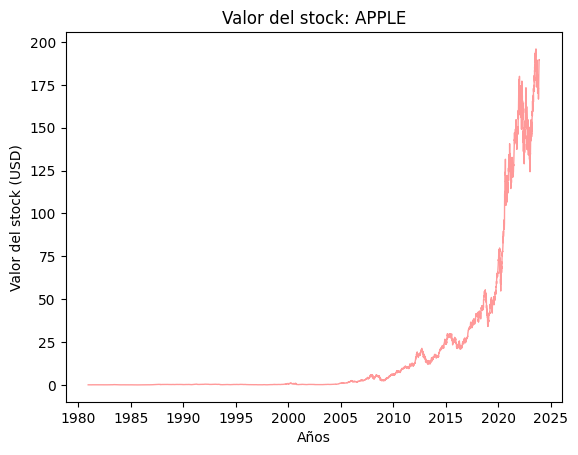

In [ ]:
plt.plot(df["Close"], c="red", linewidth=1,alpha=0.4)
#Al tener nuestros datos importados con el índice en formato de DateTime
#nuestra serie de tiempo ahora muestra el eje x como años.
plt.xlabel("Años")
plt.ylabel("Valor del stock (USD)")
plt.title("Valor del stock: APPLE")

### Problemáticas de la gráfica anterior.
- La escala del valor del stock no permite llevar a cabo comparaciones justas en los cambios del valor.
- Los cambios en periodos de tiempo pequeños no se ven reflejados.
- La distribución de los valores no permite extraer información de la serie de tiempo.

## Concepto de Histograma

Objetivo: Describir cuáles son los valores más comunes, es decir, los que tienen más probabilidad de suceder.

Un histograma es una descripción gráfica que permite observar la frecuencia de ocurrencia de un valor.

En el eje x se tienen los valores y en el eje y la frecuencia con los que estos suceden.


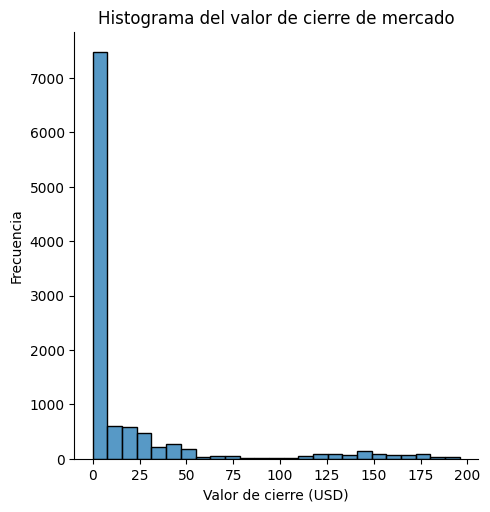

In [ ]:

sns.displot(data=df["Close"], kind="hist", bins=25)
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Frecuencia")
plt.xlabel("Valor de cierre (USD)")
plt.title("Histograma del valor de cierre de mercado")
plt.show()

En este caso es importante ver que el número de "bins" o segmentos determina en gran medida el comportamiento de la gráfica
1.   Una gran cantidad de segmentos no describirá de manera adecuada la distribución de los datos.(sobre ajuste)
2.   Una poca cantidad de segmentos causará que la distribución tampoco sea reconocible.

**Notas importantes:**


*   La frecuencia es proporcional a la probabilidad de hallar ese valor.
*   Existen distintos tipos de gráficos.
    - "hist" lleva a cabo un histograma típico.
    - "kde" estima la densidad de probabilidad.
    - "ecdf" estima la la función de distribución acumulativa.





\

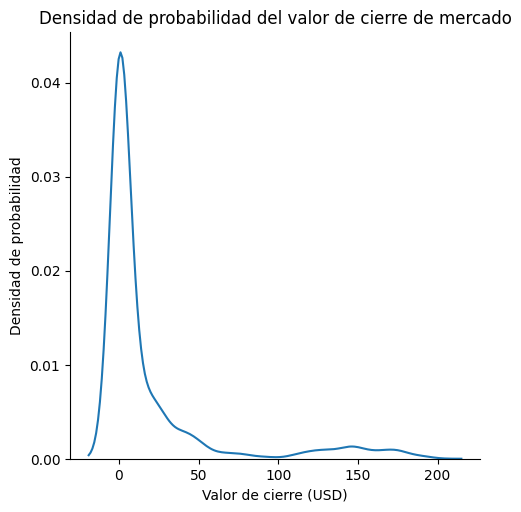

In [ ]:
sns.displot(data=df["Close"], kind="kde")
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Densidad de probabilidad")
plt.xlabel("Valor de cierre (USD)")
plt.title("Densidad de probabilidad del valor de cierre de mercado")
plt.show()

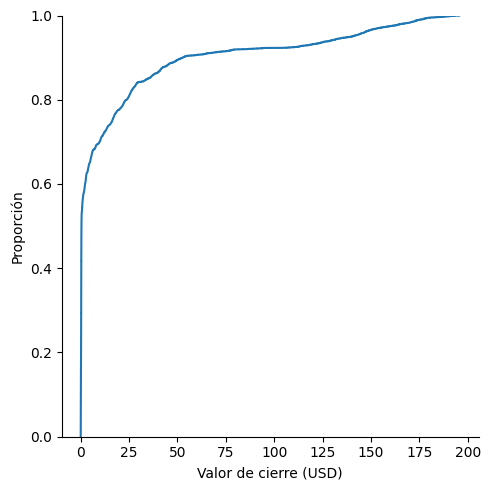

In [ ]:
sns.displot(data=df["Close"], kind="ecdf")
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Proporción")
plt.xlabel("Valor de cierre (USD)")
#plt.title("Densidad acumulativa del valor de cierre de mercado")
plt.show()

## Analogías con un proceso Físico

### El caminante aleatorio

¿En qué consiste este modelo?



In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/uPBKy8pF2eg?si=m_zHsZkgh_3hrLWb" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

Nuestro caminante aleatorio lo podemos modelar en una dimensión como una persona que camina de manera errática con 50% de ir hacia "arriba" y 50% de ir hacia "abajo"

Podemos crear un caminante aleatorio considerando la siguiente definición:



```
Comenzamos en una condición inicial.
Si número aleatorio es mayor que 0.5:
    entonces muévete hacia arriba.
En caso contrario:
    entonces muévete hacia abajo.
```

$$x(t+\tau)=x(t)+\rho(\tau)$$



Propiedades Estadísticas del Caminante Aleatorio:
* Media y Tendencia:

    * La media de un caminante aleatorio no cambia con el tiempo, ya que cada nuevo valor depende del valor anterior más un componente aleatorio. En términos estadísticos, se dice que un caminante aleatorio es no estacionario en media.
* Varianza y Volatilidad:

    * La varianza de un caminante aleatorio aumenta linealmente con el tiempo. Esto significa que la volatilidad también aumenta con el tiempo.
* Autocorrelación:

    * La autocorrelación de un caminante aleatorio disminuye lentamente a medida que aumenta el rezago (lag). En otras palabras, las observaciones más antiguas están débilmente correlacionadas con las observaciones más recientes.
* Pruebas de Estacionariedad:

    * Las pruebas de estacionariedad, como la Prueba Aumentada de Dickey-Fuller (ADF), a menudo rechazan la hipótesis de estacionariedad para un caminante aleatorio en términos estrictos. Esto es porque la varianza creciente viola uno de los supuestos de la estacionariedad.

In [ ]:
random_points=np.random.rand(100)
x=np.arange(len(random_points))
for element in random_points:
    if element >0.5:
        element=element+1
    else:
        element=element-1

Text(0.5, 1.0, 'Caminante aleatorio')

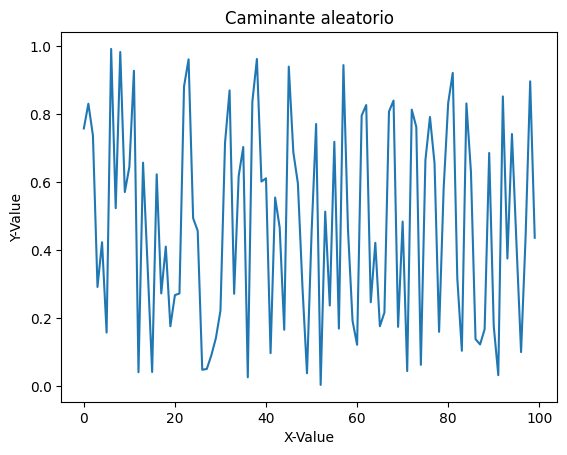

In [ ]:
plt.plot(random_points)
plt.ylabel("Y-Value")
plt.xlabel("X-Value")
plt.title("Caminante aleatorio")

## ¿Cómo se ven estos puntos aleatorios?
-  Visualización del histograma

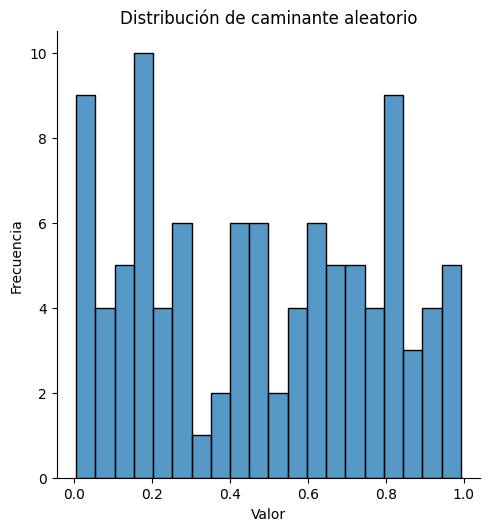

In [ ]:
sns.displot(random_points, kind="hist", bins=20)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución de caminante aleatorio")
plt.show()

## Hablemos de otras escalas.
La escala logaritmica y semilogarimica.

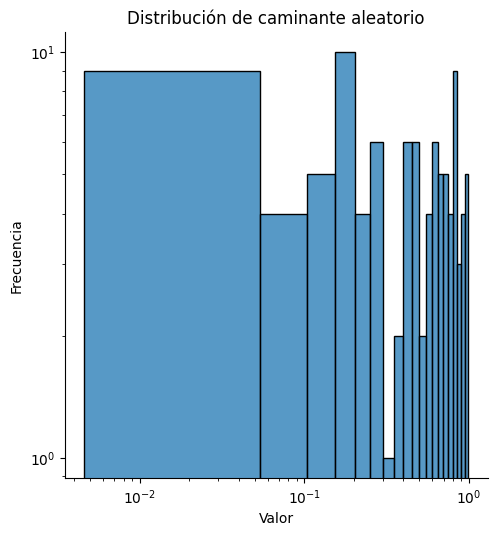

In [ ]:
sns.displot(np.sort(random_points), kind="hist", bins=20)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución de caminante aleatorio")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Las series de tiempo deben considerarse estacionarias bajo la hipótesis del mercado financiero.

Una forma de hacer esto es calculando los retornos o retornos logarítmicos:
$$R(t)=\frac{S(t)-S(t-1)}{S(t)}$$
$$R(t)= \log{\frac{S(t)}{S(t-1)}}=\log S(t)- \log S(t-1)$$

In [ ]:
def retorno(data):
    listaretorno=[]#Creo una lista vacía
    for idx in range(len(data)-1):
        listaretorno.append((data[idx+1]-data[idx])/data[idx+1])
    return np.asarray(listaretorno, dtype="f")

In [ ]:
def retorno_log(data):
    listaretorno=[]#Creo una lista vacía
    for idx in range(len(data)-1):
        listaretorno.append(np.log(data[idx+1])-np.log(data[idx]))
    return np.asarray(listaretorno, dtype="f")

# Estudiaremos ahora la volatilidad del sistema

* Una buena aproximación para la volatilidad de una serie de tiempo son las desviaciones estándar.
* Este cálculo suele hacerse mediante el cálculo por ventanas.


$$\sigma = \frac{1}{N } \sum (S_i-\mu)^2$$

In [ ]:
#Volatilidad
def sigma(data):
    #N es el número total de los datos
    N=len(data)
    return (1/N) *(np.sum(data-np.mean(data)))**2

In [ ]:
def volatilidad(datos, periodo):
    windowingsigma2=[]
    for idx in range(len(datos)-periodo):
        windowingsigma2.append(sigma(datos[idx:idx+periodo]))
    return np.asarray(windowingsigma2)

In [ ]:
tickerDf.index.values[1:]

array(['2010-01-05T05:00:00.000000000', '2010-01-06T05:00:00.000000000',
       '2010-01-07T05:00:00.000000000', ...,
       '2023-11-09T05:00:00.000000000', '2023-11-10T05:00:00.000000000',
       '2023-11-13T05:00:00.000000000'], dtype='datetime64[ns]')

## ¿Son tan distintos los retornos de los retornos logarítmicos?

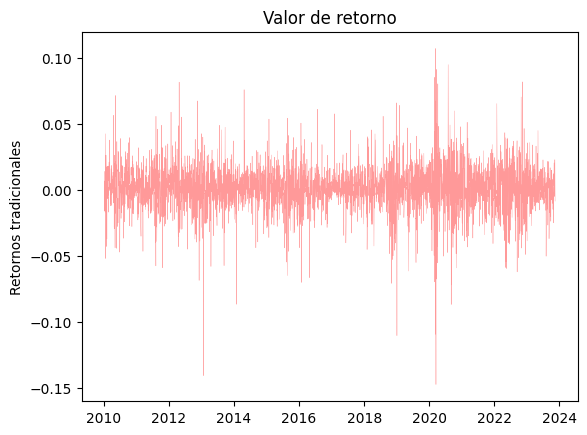

In [ ]:
plt.plot(tickerDf.index.values[1:],retorno(tickerDf["Close"]), c="r", alpha=0.4, linewidth=0.3)
plt.ylabel("Retornos tradicionales")
plt.title("Valor de retorno")
plt.show()

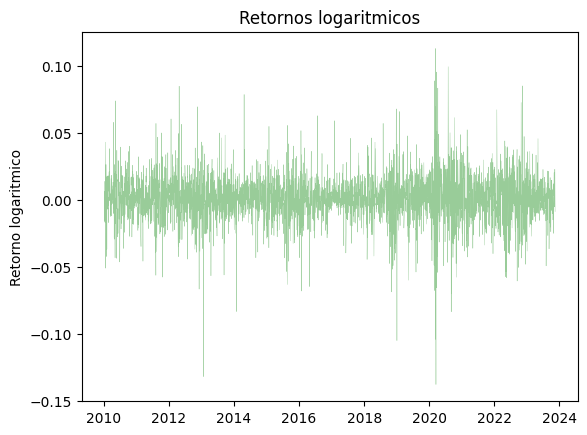

In [ ]:
plt.plot(tickerDf.index.values[1:],retorno_log(tickerDf["Close"]), c="g", alpha=0.4, linewidth=0.3)
plt.ylabel("Retorno logaritmico")
plt.title("Retornos logaritmicos")
plt.show()

Text(0.5, 1.0, 'Histograma de retornos logarítmicos')

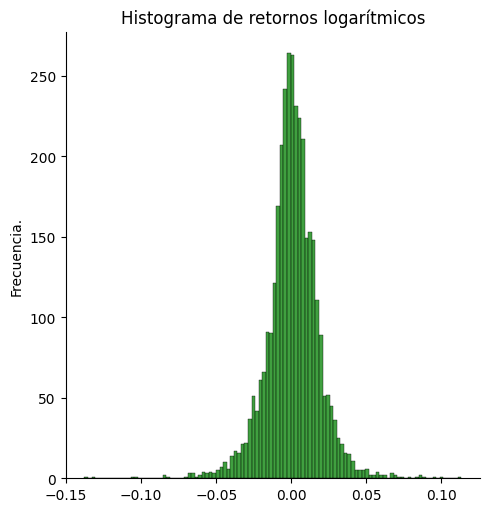

In [ ]:
# Distribución de los valores de los retornos
sns.displot(retorno_log(tickerDf["Close"]), kind="hist", color="g")
plt.ylabel("Frecuencia.")
plt.title("Histograma de retornos logarítmicos")

In [ ]:
#Estadísticas descriptivas:
rl=retorno_log(tickerDf["Close"])
print(f"El promedio de la distribución es: {np.mean(rl)}")
print(f"La desviación estándar de la distribución es: {np.std(rl)}")

El promedio de la distribución es: 0.0009603635407984257
La desviación estándar de la distribución es: 0.017837049439549446


### Observemos que es totalmente distinto de la distribución de valores originales.

* ¿Distribución de pareto?

## Graficando la volatilidad

Text(0.5, 1.0, 'Volatilidad de los LogReturns')

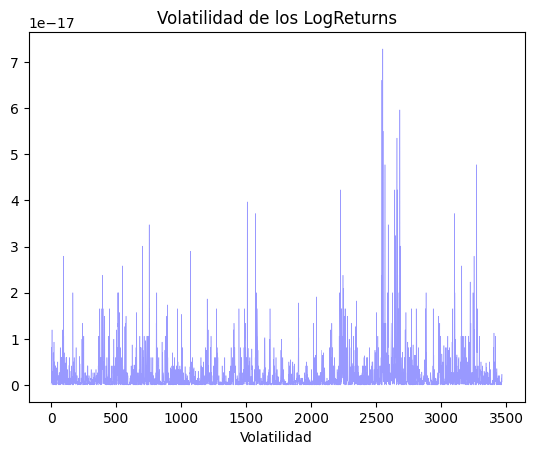

In [ ]:
plt.plot(volatilidad(retorno_log(tickerDf["Close"]),21), c="b", alpha=0.4, linewidth=0.4)
plt.xlabel("Volatilidad")
plt.title("Volatilidad de los LogReturns")

## Otra aproximación conveniente es en términos de los valores absolutos al cuadrado de los retornos logarítmicos


Text(0.5, 1.0, 'Volatilidad de los LogReturns Segunda interpretación.')

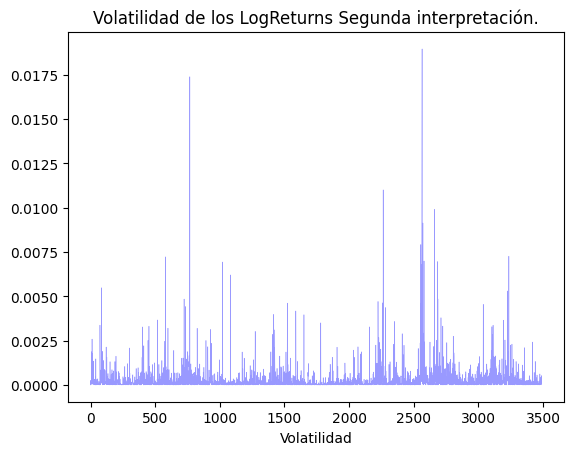

In [ ]:
plt.plot(np.abs(retorno_log(tickerDf["Close"]))**2, c="b", alpha=0.4, linewidth=0.4)
plt.xlabel("Volatilidad")
plt.title("Volatilidad de los LogReturns Segunda interpretación.")

# Una aproximación por medio de los modelos lineales

## Verificar funcionamiento

In [ ]:
%%capture
!pip install statsmodels

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Función para visualizar la serie temporal y sus autocorrelaciones
def visualizar_datos(serie_temporal):
    # Graficar la serie temporal
    plt.figure(figsize=(12, 6))
    plt.plot(serie_temporal)
    plt.title('Serie Temporal')
    plt.show()

    # Graficar autocorrelación y autocorrelación parcial
    plot_acf(serie_temporal, lags=40)
    plt.title('Autocorrelación')
    plt.show()

    plot_pacf(serie_temporal, lags=40)
    plt.title('Autocorrelación Parcial')
    plt.show()

In [ ]:
# Función para realizar la prueba de estacionariedad
def prueba_estacionariedad(serie_temporal):
    resultado_prueba = adfuller(serie_temporal)
    p_valor = resultado_prueba[1]

    if p_valor <= 0.05:
        print(f'La serie temporal es estacionaria (p-valor: {p_valor:.4f})')
    else:
        print(f'La serie temporal NO es estacionaria (p-valor: {p_valor:.4f})')

In [ ]:
# Función para ajustar un modelo SARIMA y realizar predicciones
def ajustar_modelo_sarima(serie_temporal):
    # Dividir la serie temporal en entrenamiento y prueba
    longitud_entrenamiento = int(len(serie_temporal) * 0.8)
    serie_entrenamiento = serie_temporal[:longitud_entrenamiento]
    serie_prueba = serie_temporal[longitud_entrenamiento:]

    # Ajustar un modelo SARIMA
    orden = (1, 1, 1, 7)  # Parámetros p, d, q, y estacionalidad (en este caso, semanal)
    modelo = SARIMAX(serie_entrenamiento, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    resultado_modelo = modelo.fit(disp=False)

    # Realizar predicciones en el conjunto de prueba
    predicciones = resultado_modelo.get_forecast(steps=len(serie_prueba))

    # Graficar resultados
    plt.figure(figsize=(12, 6))
    plt.plot(serie_entrenamiento, label='Entrenamiento')
    plt.plot(serie_prueba, label='Prueba')
    plt.plot(predicciones.predicted_mean, label='Predicciones', color='red')
    plt.title('Modelo SARIMA - Serie Temporal y Predicciones')
    plt.legend()
    plt.show()

In [ ]:
# Cargar y preprocesar la serie temporal
serie_temporal = retorno_log(tickerDf["Close"]) #cargar_datos()

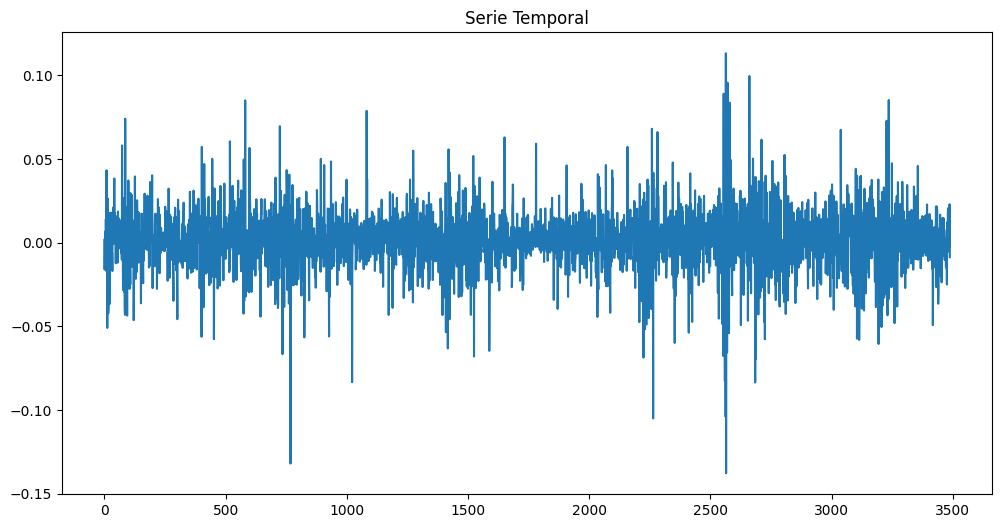

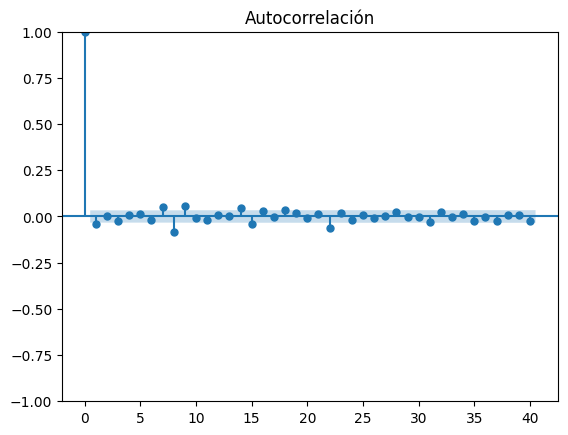

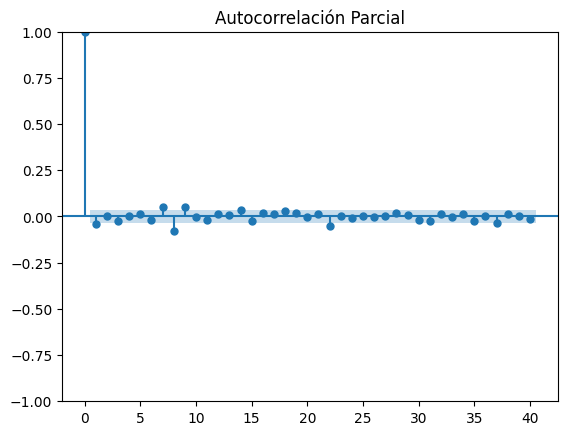

In [ ]:
# Visualizar la serie temporal y sus autocorrelaciones
visualizar_datos(serie_temporal)

In [ ]:
# Realizar prueba de estacionariedad
prueba_estacionariedad(serie_temporal)

La serie temporal es estacionaria (p-valor: 0.0000)


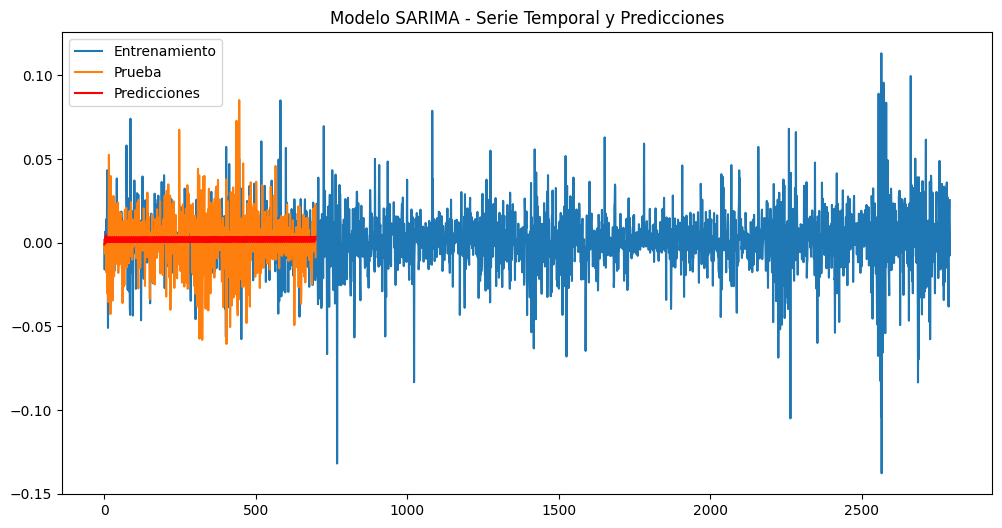

In [ ]:
# Ajustar modelo SARIMA y realizar predicciones
ajustar_modelo_sarima(serie_temporal)

Cargar Datos:

- La función cargar_datos() genera datos simulados para la serie temporal. Puedes reemplazar esto con la carga de tus propios datos.
Visualizar Datos:

- La función visualizar_datos() grafica la serie temporal y sus funciones de autocorrelación y autocorrelación parcial.
Prueba de Estacionariedad:

- La función prueba_estacionariedad() realiza la prueba de Dickey-Fuller aumentada para evaluar la estacionariedad de la serie temporal.
Ajustar Modelo SARIMA:

- La función ajustar_modelo_sarima() ajusta un modelo SARIMA a la serie temporal, utilizando parte de los datos como conjunto de entrenamiento y realizando predicciones en el conjunto de prueba.
Este ejemplo utiliza datos simulados y un modelo SARIMA básico. Ajusta los parámetros según tus necesidades y el conjunto de datos real.



* Hipótesis Nula (H0): La serie temporal tiene una raíz unitaria y, por lo tanto, no es estacionaria.

* Hipótesis Alternativa (H1): La serie temporal no tiene una raíz unitaria y es estacionaria.

Interpretación del Valor p:

* Si el valor p es menor que un umbral (como 0.05), se rechaza la hipótesis nula, indicando estacionariedad.
Si el valor p es mayor que el umbral, no se puede rechazar la hipótesis nula, lo que sugiere no estacionariedad.]

## Un modelo de IA para esto:
- ¿Qué tan útil es?

In [ ]:
%%capture
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

# Cargar y visualizar datos
serie_temporal =tickerDf["Close"]
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
serie_normalizada = scaler.fit_transform(serie_temporal.values.reshape(-1, 1))

# Función para crear conjuntos de datos para entrenamiento
def crear_datos_entrenamiento(datos, lag=1):
    X, y = [], []
    for i in range(len(datos)-lag):
        X.append(datos[i:(i+lag), 0])
        y.append(datos[i+lag, 0])
    return np.array(X), np.array(y)

In [ ]:
# Crear conjuntos de entrenamiento y prueba
lag = 3
X, y = crear_datos_entrenamiento(serie_normalizada, lag)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [ ]:

# Reshape para que sea compatible con la entrada de la red LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crear modelo LSTM
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
modelo.add(LSTM(units=50))
modelo.add(Dense(units=1))
modelo.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 12s 16ms/step - loss: 0.0209
Epoch 2/100
88/88 [==============================] - 1s 15ms/step - loss: 0.0175
Epoch 3/100
88/88 [==============================] - 1s 13ms/step - loss: 0.0174
Epoch 4/100
88/88 [==============================] - 1s 16ms/step - loss: 0.0173
Epoch 5/100
88/88 [==============================] - 2s 17ms/step - loss: 0.0171
Epoch 6/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0170
Epoch 7/100
88/88 [==============================] - 1s 13ms/step - loss: 0.0169
Epoch 8/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0168
Epoch 9/100
88/88 [==============================] - 2s 21ms/step - loss: 0.0167
Epoch 10/100
88/88 [==============================] - 2s 19ms/step - loss: 0.0166
Epoch 11/100
88/88 [==============================] - 2s 23ms/step - loss: 0.0164
Epoch 12/100
88/88 [==============================] - 2s 22ms/step - loss: 0.0163
Epoch 13/100
88/88 [====

In [ ]:
# Realizar predicciones
predicciones = modelo.predict(X_test)
predicciones = scaler.inverse_transform(predicciones)

22/22 [==============================] - 1s 3ms/step


Mean Squared Error: 1338.2122683654677


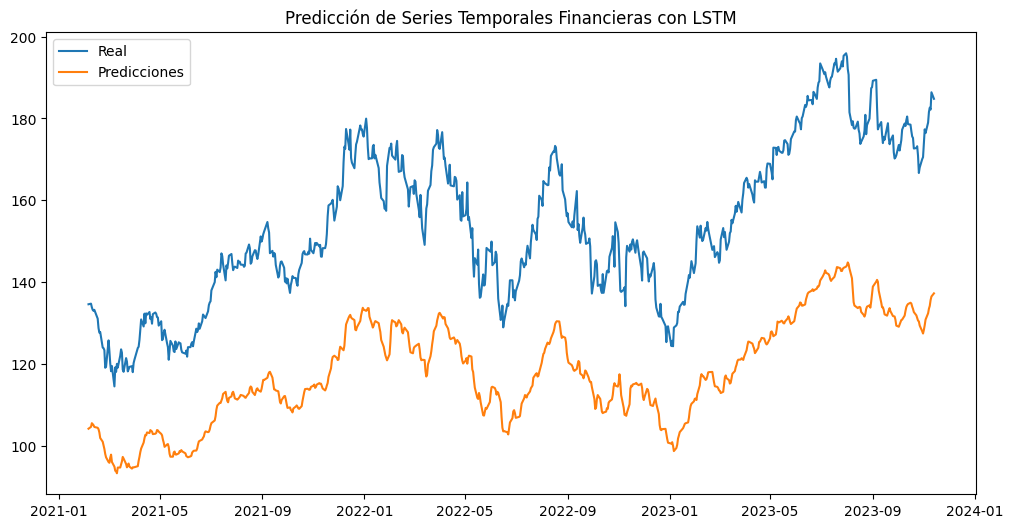

In [ ]:
# Desnormalizar datos de prueba
y_test_desnormalizado = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_desnormalizado, predicciones)
print(f'Mean Squared Error: {mse}')

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index[train_size+lag:], y_test_desnormalizado, label='Real')
plt.plot(serie_temporal.index[train_size+lag:], predicciones, label='Predicciones')
plt.title('Predicción de Series Temporales Financieras con LSTM')
plt.legend()
plt.show()